### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know:

    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


### Approach Followed :

Step 1: Reading and Understanding of data

Step 2: Data Cleaning

Step 3: Data Visualization

Step 4: Data Preparation

Step 5: Train-Test Splitting

Step 6: Standard Linear Regression

Step 7: Linear Regression with L1- Ridge  Regression

Step 8: Linear Regression with L2- Lasso Regression


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

In [83]:
#reading and interpreting the structure of the data
df = pd.read_csv("train.csv")

In [84]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
#getting the shape of the dataframe
df.shape

(1460, 81)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Step 2: Data Cleaning

In [88]:
#checking for missing values 
missing_var = df.isnull().sum()
missing_var_percentage = missing_var*100/len(df)
missing_var_table = pd.concat([missing_var, missing_var_percentage], axis=1)
missing_var_table = missing_var_table.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_var_table = missing_var_table.sort_values('Missing Values',ascending = False)
missing_var_table.head(15)

,Missing Values,% of Total Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [89]:
#checking for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [90]:
#checking for null values in all numerical columns

df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [91]:
#replacing the value of NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    df[col]=df[col].fillna('None')

In [92]:
#recheck for categotical variables after treatment
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [93]:
#treating null values for numerical data columns
#imputing null values with median values for LotFrontage and MasVnrArea columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [94]:
#treating GarageYrBlt by setting the null values with 0 temporarily

df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [95]:
#Finding columns that have more than 85% values associated to a specific value

def HighCategoricalValueCount():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

cat_var_removed = HighCategoricalValueCount()

#removing columns with skewed data

df.drop(cat_var_removed, axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [96]:
#Drop of columns numerical fcolumns with more than 85% of values 

def HighNumericalValueCount():
    column = []
    numerical_columns = df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

num_var_removed = HighNumericalValueCount()
df.drop(num_var_removed, axis = 1, inplace = True)

#dropping MoSold too as we will not need this
df.drop(['MoSold'], axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2003,RFn,2,548,0,61,None,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,1976,RFn,2,460,298,0,None,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2001,RFn,2,608,0,42,None,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,1998,Unf,3,642,0,35,None,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,2000,RFn,3,836,192,84,None,2008,Normal,250000


In [97]:
#Column addition for Remodel check

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['Remodel'] = df.apply(checkForRemodel, axis=1)
df.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice,Remodel
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,RFn,2,548,0,61,None,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,RFn,2,460,298,0,None,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,RFn,2,608,0,42,None,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,Unf,3,642,0,35,None,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,RFn,3,836,192,84,None,2008,Normal,250000,0


In [98]:
#Column addition for Building age

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuildingAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice,Remodel,BuildingAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,2008,Normal,250000,0,8


In [99]:
#Garage new or Old if built after 2000 

def GarageNewOld(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(GarageNewOld)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice,Remodel,BuildingAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,548,0,61,None,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,460,298,0,None,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,608,0,42,None,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,642,0,35,None,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,836,192,84,None,2008,Normal,250000,0,8,1


In [100]:
#Dropping few features based derived additional features

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [101]:
#Recheck for NULL values

missing_var_new = round(100*(df.isnull().sum()/len(df.index)), 2)
print(missing_var_new)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
LotShape          0.0
LotConfig         0.0
Neighborhood      0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
HeatingQC         0.0
1stFlrSF          0.0
2ndFlrSF          0.0
GrLivArea         0.0
BsmtFullBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenQual       0.0
TotRmsAbvGrd      0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
Fence             0.0
SaleCondition     0.0
SalePrice 

In [102]:
#Check for Duplicates in data

df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,Remodel,BuildingAge,OldOrNewGarage


In [103]:
#Check for OUTLIERS at different check points

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodel,BuildingAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


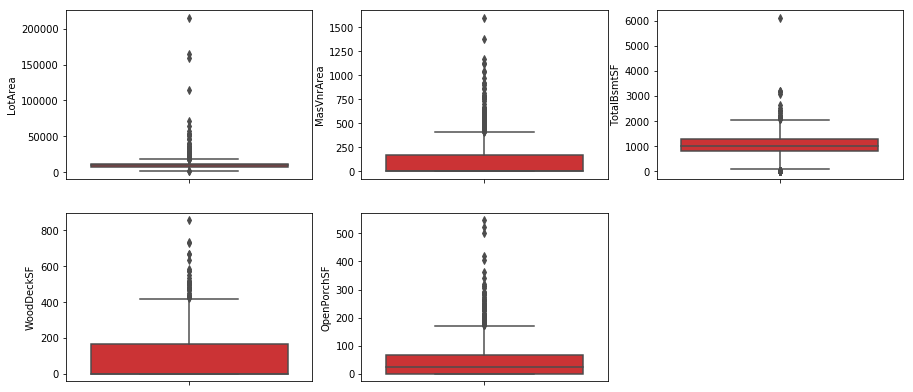

In [104]:
#Finding out OUTLIERS in data

plt.figure(figsize=(15, 18))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set1', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set1', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set1', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set1', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set1', data = df)
plt.show()

In [105]:
#removing values beyond 99% for MasVnrArea

MasVnrArea_outlier = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < MasVnrArea_outlier]

#removing values beyond 99% for WoodDeckSF

WoodDeckSF_outlier = df['WoodDeckSF'].quantile(0.99)
df = df[df["MasVnrArea"] < WoodDeckSF_outlier]

#removing values beyond 98% for LotArea

LotArea_outlier = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < LotArea_outlier]

#removing values beyond 99% for OpenPorchSF

OpenPorchSF_outlier = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < OpenPorchSF_outlier]

#removing values beyond 99% for TotalBsmtSF

TotalBsmtSF_outlier = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < TotalBsmtSF_outlier]

#### Data Visualization

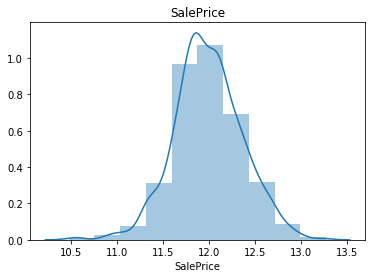

In [106]:
#Salesprice using Log function

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

<Figure size 720x360 with 0 Axes>

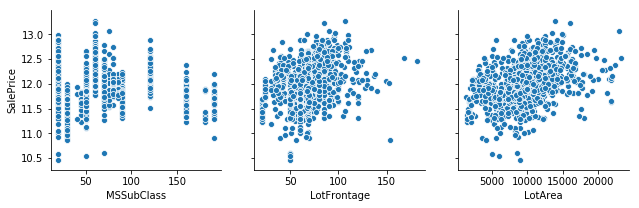

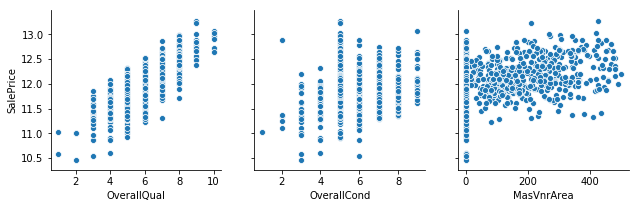

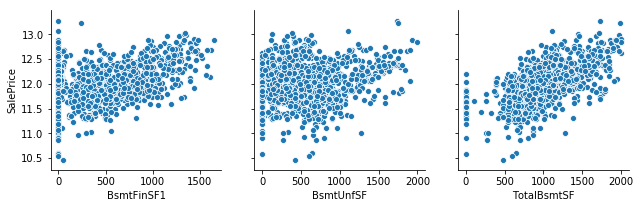

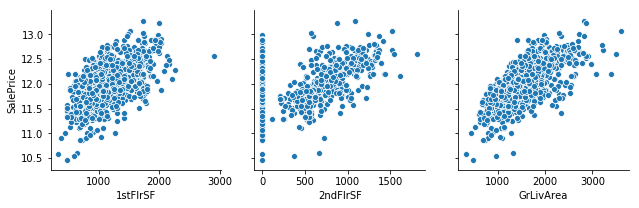

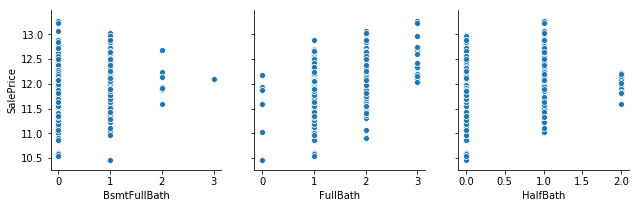

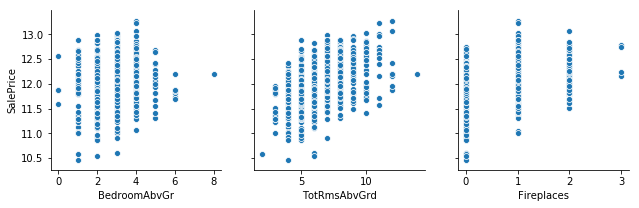

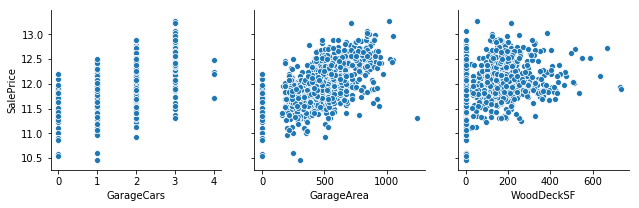

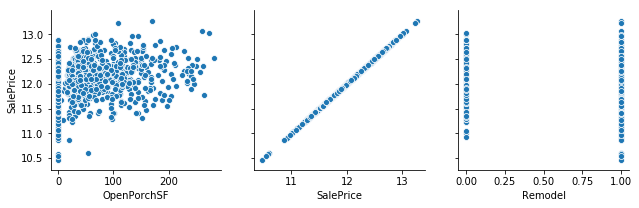

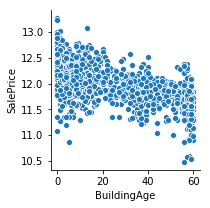

In [107]:
#Numerical Value Pair plots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'Remodel'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BuildingAge'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
plt.show()

Cannot conclusively determine any particular correlations from the scatter plot. Furthermore analysis will be done. Will be checking correlations with a heatmap next. 

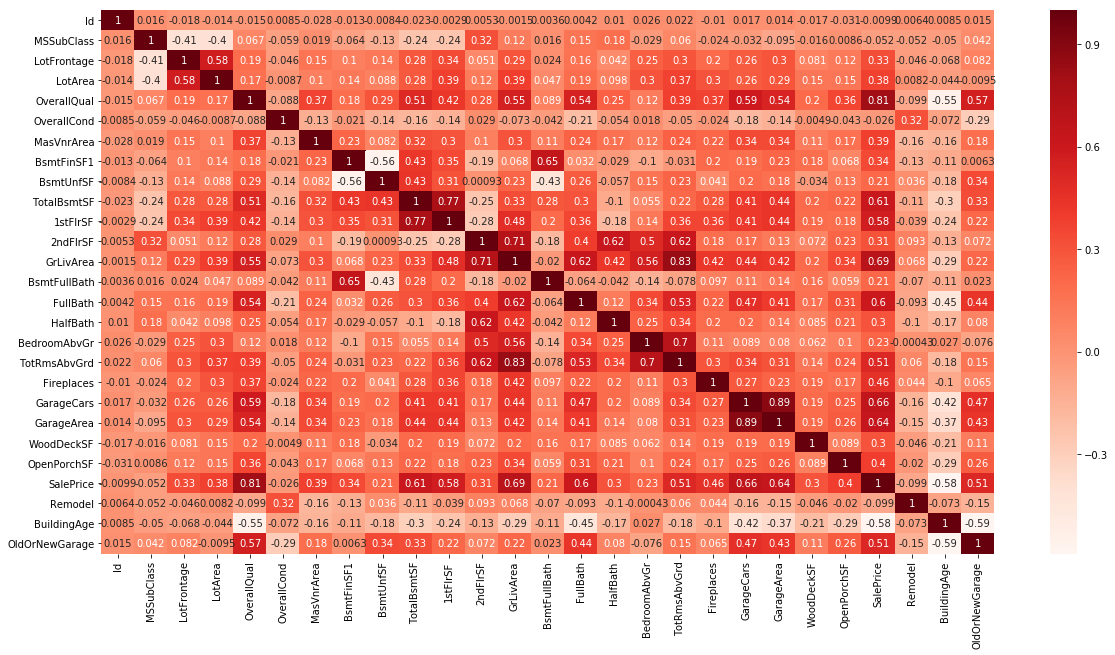

In [108]:
#Correlation using heat-map

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="Reds")
plt.show()

<Figure size 3600x2880 with 0 Axes>

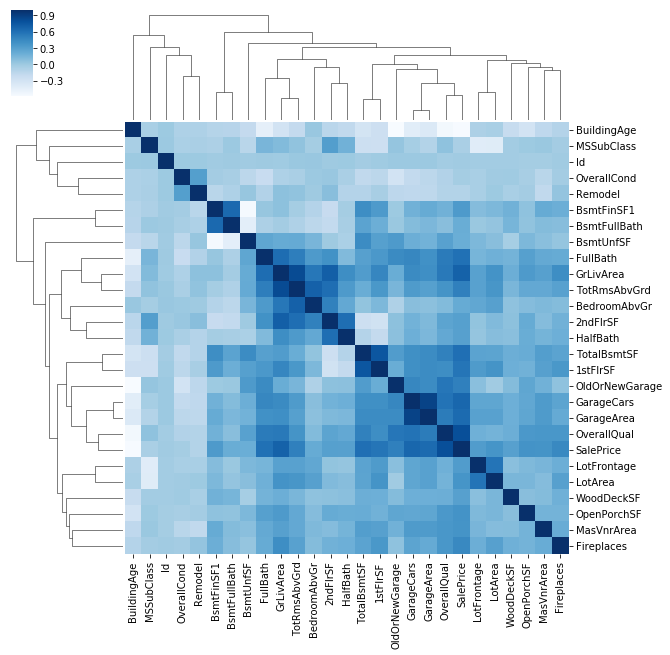

In [109]:
#analyzing the correlations of the numerical columns using cluster-map

plt.figure(figsize = (50, 40))
sns.clustermap(df.corr(), annot = False, cmap= "Blues")
plt.show()

From above correlation, variables like GarageCars, LotArea, GarageArea, FullBath, BsmtUnf5f and much more are important.

Removing columns TotRmsAbvGrd (82%) and GarageArea (88%) as they are highly correlated with the target variable

In [110]:
#removing highly correlated variables

df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [111]:
#checking the shape of the dataframe after dropping these values

df.shape

(1346, 47)

##### Data Preparation

In [112]:
#ordered values have an ordered sequence value and unordered values is to be categorised into into 0 and 1

df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['d_BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['d_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['d_Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['d_LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['d_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['d_SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [113]:
##Dropping few columns based on additional derived columns

df = df.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [114]:
#creating dummies for the following categorical variables

#creating dummies for MSZoning

MSZoning_dummy = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, MSZoning_dummy], axis = 1)

#creating dummies for Neighborhood

Neighborhood_dummy = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, Neighborhood_dummy], axis = 1)

#creating dummies for GarageType

GarageType_dummy = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, GarageType_dummy], axis = 1)

#creating dummies for Exterior1st

Exterior1st_dummy = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, Exterior1st_dummy], axis = 1)

# Creating dummies for Exterior2nd

Exterior2nd_dummy = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, Exterior2nd_dummy], axis = 1)

#creating dummies for RoofStyle

RoofStyle_dummy = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, RoofStyle_dummy], axis = 1)

#creating dummies for Foundation

Foundation_dummy = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, Foundation_dummy], axis = 1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,1,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,0,0,1,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,1,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,0,0,1,0,0,0


In [115]:
#dropping the base columns from the ones for which we have created dummy variables

df = df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType'], axis=1)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,0,0,1,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,1,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,0,0,1,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,1,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,0,0,1,0,0,0


In [116]:
#checking shape and info of the dataframe after data preparation steps
df.shape

(1346, 112)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1459
Columns: 112 entries, MSSubClass to Foundation_Wood
dtypes: float64(3), int64(36), uint8(73)
memory usage: 516.6 KB


#### Train-Test Splitting

We will be dropping the target variable from the X variable and adding the target variable to the y variable

In [118]:
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,0,0,1,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,1,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,0,0,1,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,1,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,0,0,1,0,0,0


In [119]:
y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [120]:
#Feature scaling using scale module

columns_scaling = X.columns
X = pd.DataFrame(scale(X))
X.columns = columns_scaling
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood'],
      dtype='object', length=111)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state = 100)

In [122]:
#checking the shape of the train and test sets
X_train.shape

(942, 111)

In [123]:
X_test.shape

(404, 111)

In [124]:
y_train.shape

(942,)

In [125]:
y_test.shape

(404,)

#### Standard Linear Regression

In [126]:
#creating the linear regression object

lm = LinearRegression()
lm.fit(X_train, y_train)

#creating RFE object with the number of the feature selection variables equal to 50
rfe = RFE(lm, n_features_to_select = 50)            
rfe = rfe.fit(X_train, y_train)

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [127]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 9),
 ('LotFrontage', False, 26),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 20),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 44),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 6),
 ('2ndFlrSF', False, 31),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 27),
 ('Fireplaces', False, 5),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 25),
 ('OpenPorchSF', False, 4),
 ('Remodel', True, 1),
 ('BuildingAge', True, 1),
 ('OldOrNewGarage', False, 3),
 ('d_LotShape', False, 33),
 ('d_ExterQual', False, 49),
 ('d_BsmtQual', True, 1),
 ('d_BsmtExposure', True, 1),
 ('d_BsmtFinType1', False, 29),
 ('d_HeatingQC', True, 1),
 ('d_KitchenQual', True, 1),
 ('d_FireplaceQu', True, 1),
 ('d_GarageFinish', False, 28),
 ('d_BldgType', True, 1),
 ('d_HouseStyle', False, 10),
 ('d_Fence', False, 58),
 ('d_LotConfig', False, 62),
 ('d_MasVnrType

In [128]:
#assigning the 50 columns to X_train_rfe
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [129]:
#assigning X_train and X_test with rfe chosen values for model evaluation

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [130]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
#model prediction with train set
y_train_pred = lm.predict(X_train)
#r2 score for the train model
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.9215967318955265

In [132]:
#model prediction with test set
y_test_pred = lm.predict(X_test)
#r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

0.8929834071293978

##### Linear Regression with L1- Ridge  Regression

Introducing regularization using ridge regression. We will begin with specifying the list of alphas, then conduct cross validation and creating new dataframe after hyperparameter tuning.

In [133]:
#listing the different values of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

#instantiating ridge regression
ridge = Ridge()

In [134]:
#conducting cross validation with 10 folds
folds = 10
model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2',cv=folds, return_train_score=True, verbose=1)

#model fitting with the train set
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 23 candidates, totalling 230 fits


[Parallel(n_jobs=1)]: Done 230 out of 230 | elapsed:    0.3s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [135]:
#building dataframe with model_ridge results

ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001059,0.000786,0.000324,0.000448,0.0001,{'alpha': 0.0001},0.880166,0.929899,0.928857,0.865384,...,0.920084,0.927152,0.92138,0.919191,0.920718,0.921778,0.92376,0.923975,0.922213,0.002393
1,0.001144,0.000551,0.000149,0.000319,0.001,{'alpha': 0.001},0.880166,0.929900,0.928858,0.865384,...,0.920084,0.927152,0.92138,0.919191,0.920718,0.921778,0.92376,0.923975,0.922213,0.002393
2,0.000799,0.000399,0.000299,0.000457,0.01,{'alpha': 0.01},0.880174,0.929906,0.928863,0.865385,...,0.920084,0.927152,0.92138,0.919191,0.920718,0.921778,0.92376,0.923975,0.922213,0.002393
3,0.000857,0.000462,0.000298,0.000456,0.05,{'alpha': 0.05},0.880209,0.929932,0.928887,0.865388,...,0.920084,0.927152,0.92138,0.919191,0.920718,0.921778,0.92376,0.923975,0.922213,0.002393
4,0.001015,0.000447,0.000100,0.000299,0.1,{'alpha': 0.1},0.880251,0.929966,0.928916,0.865392,...,0.920084,0.927152,0.92138,0.919191,0.920718,0.921778,0.92376,0.923975,0.922213,0.002393


In [136]:
#converting the 'param_alpha' datatype from object type to int type
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

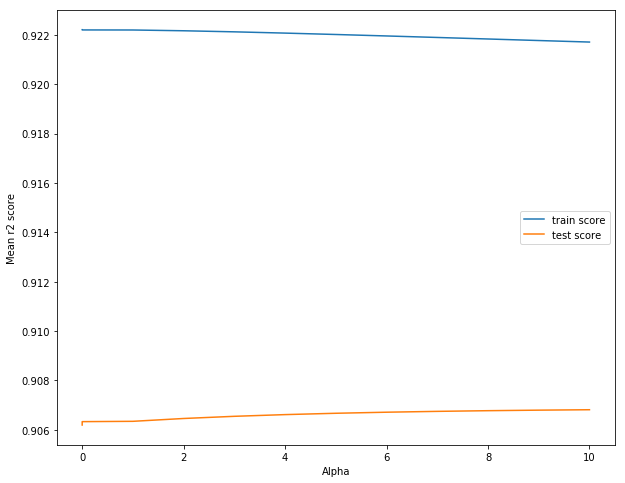

In [137]:
#plotting mean of train score
plt.figure(figsize=(10,8))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])

#plotting mean of the test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('Alpha')
plt.ylabel('Mean r2 score')
plt.show()

In [138]:
#instantiating ridge regression with alpha=2
model_ridge = Ridge(alpha=2)

#model fitting with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [139]:
#model prediction with train set
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9215611248448798


In [140]:
#model prediction with test set
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8925929091801981


Assignment Solutions: 

Assignment Question 2: 

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?
    

Solution:

In [141]:
#checking values with alpha=4 for assignment purposes
model_ridge_2 = Ridge(alpha=4)

#model fitting with the train set
model_ridge_2.fit(X_train, y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [142]:
#model prediction with train set
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9215611248448798


In [143]:
#model prediction with test set
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8925929091801981


As we can see there is not a substantial difference between the train and test scores for alpha values for 2 and 4 in case of ridge regression. 

In [144]:
#checking the coefficient values with lambda = 4

alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02205086,  0.06937871,  0.03676258,  0.02560878,  0.04951233,
        0.1079936 ,  0.01390719,  0.01626623,  0.0144856 ,  0.02801587,
       -0.0133872 , -0.02439216,  0.01452804,  0.01700855,  0.01780899,
        0.02332518,  0.0175727 , -0.02004263,  0.01421031,  0.03729842,
        0.02236449,  0.08246595,  0.0578971 ,  0.01425262, -0.01136405,
       -0.01284851, -0.01349847, -0.00688027,  0.01919741, -0.02836396,
       -0.00906299,  0.020464  ,  0.01349395,  0.03971749,  0.00901059,
        0.02088714,  0.03002692, -0.02221746,  0.01559635, -0.0173456 ,
       -0.01359712, -0.01428494, -0.0009012 ,  0.02289059,  0.00970361,
        0.01669774,  0.01277237,  0.01496477,  0.03108686,  0.01090962])

In [145]:
#generating a table with the features and coefficients in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0221
1,OverallQual,0.0694
2,OverallCond,0.0368
3,BsmtFinSF1,0.0256
4,TotalBsmtSF,0.0495
5,GrLivArea,0.1080
6,BsmtFullBath,0.0139
7,FullBath,0.0163
8,HalfBath,0.0145
9,GarageCars,0.0280


In [146]:
#sorting it to find out the most important predictor variables
ridge_df.sort_values(by="Coefficient", ascending=False)

,Features,Coefficient
5,GrLivArea,0.1080
21,MSZoning_RL,0.0825
1,OverallQual,0.0694
22,MSZoning_RM,0.0579
4,TotalBsmtSF,0.0495
33,GarageType_Attchd,0.0397
19,MSZoning_FV,0.0373
2,OverallCond,0.0368
48,Foundation_PConc,0.0311
36,GarageType_Detchd,0.0300


As we can see, in ridge regression, the most important predictor variable are: GrLivArea, MSZoning_RL, OverallQual, MSZoning_RM, TotalBsmtSF

##### Step 8: Linear Regression with L2- Lasso Regression

Conducting regularization L2 using lasso regression. We will begin with specifying the list of alphas, then conduct cross validation and creating new dataframe after hyperparameter tuning in the same sequence as conducted with ridge regression.

In [147]:
#listing the different values of hyperparameters (alpha) for preparation of lasso regression

params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2]}

In [148]:
#instantiating lasso regression
lasso = Lasso()

In [149]:
#conducting cross validation with 10 folds

model_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)

#model fitting with train set
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.1s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [150]:
#generating dataframe with model_cv results for lasso

lasso_result = pd.DataFrame(model_cv.cv_results_)
lasso_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006617,0.002204,0.000000,0.000000,1e-06,{'alpha': 1e-06},0.880174,0.929906,0.928866,0.865384,...,0.920084,0.927152,0.921380,0.919191,0.920718,0.921778,0.923760,0.923975,0.922213,0.002393
1,0.004409,0.000590,0.000298,0.000455,1e-05,{'alpha': 1e-05},0.880253,0.929968,0.928937,0.865382,...,0.920083,0.927152,0.921379,0.919191,0.920718,0.921778,0.923760,0.923975,0.922213,0.002393
2,0.003363,0.000439,0.000100,0.000299,0.0001,{'alpha': 0.0001},0.880999,0.930552,0.929543,0.865330,...,0.920044,0.927116,0.921343,0.919156,0.920679,0.921744,0.923723,0.923936,0.922176,0.002393
3,0.001971,0.000588,0.000302,0.000461,0.001,{'alpha': 0.001},0.886173,0.934846,0.931336,0.863494,...,0.917774,0.924900,0.919513,0.916841,0.918659,0.919216,0.921333,0.922582,0.920009,0.002475
4,0.001050,0.000154,0.000200,0.000400,0.01,{'alpha': 0.01},0.884886,0.929137,0.925477,0.834655,...,0.901035,0.907968,0.902188,0.899990,0.902400,0.902391,0.904234,0.904910,0.902854,0.002427


In [151]:
#converting the 'param_alpha' datatype from object to int type

lasso_result['param_alpha'] = lasso_result['param_alpha'].astype('int32')

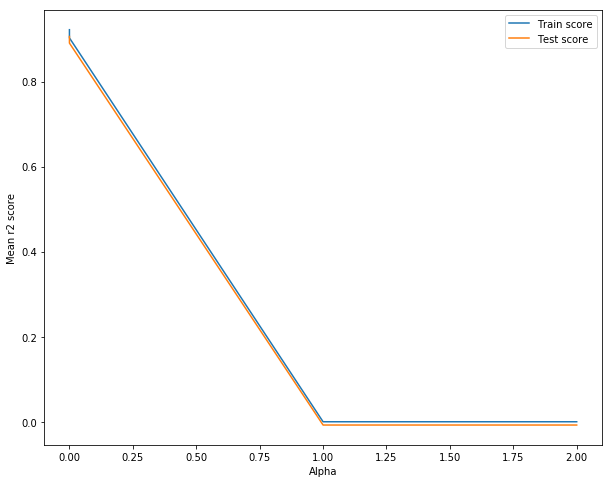

In [152]:
#plotting mean of train score

plt.figure(figsize=(10,8))
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'])

#plotting mean of the test score
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'])

plt.legend(['Train score', 'Test score'])
plt.xlabel('Alpha')
plt.ylabel('Mean r2 score')
plt.show()

In [153]:
#instantiating lasso regression with the alpha=0.002
model_lasso = Lasso(0.002)

#model fitting with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [154]:
X_train.head(10)

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,GarageCars,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab
798,-0.178873,-0.009586,-0.530152,0.220333,-0.563760,0.462436,-0.805727,0.851404,1.259670,0.375113,...,1.347553,-0.397929,-0.027267,-0.206404,-0.421429,1.371943,-0.392904,-0.884749,1.145738,-0.134738
1044,0.382003,-0.768535,-0.530152,-0.497549,-0.111157,-1.057194,-0.805727,-1.005954,-0.737404,-2.346729,...,-0.742086,-0.397929,-0.027267,-0.206404,-0.421429,-0.728893,-0.392904,-0.884749,1.145738,-0.134738
525,1.064947,-0.768535,-0.530152,-0.450996,1.896272,0.561169,-0.805727,0.851404,-0.737404,0.375113,...,-0.742086,-0.397929,-0.027267,-0.206404,-0.421429,-0.728893,-0.392904,1.130264,-0.872800,-0.134738
155,0.380860,-0.768535,-0.530152,-0.088380,1.600749,0.859514,1.162528,-1.005954,-0.737404,-0.985808,...,-0.742086,2.513010,-0.027267,-0.206404,-0.421429,-0.728893,2.545148,1.130264,-0.872800,-0.134738
1022,-0.375266,-0.009586,-0.530152,-1.016971,-0.244276,0.479607,-0.805727,0.851404,1.259670,0.375113,...,1.347553,-0.397929,-0.027267,-0.206404,-0.421429,1.371943,-0.392904,-0.884749,1.145738,-0.134738
499,2.209284,0.749364,-0.530152,0.340388,-0.963116,0.063211,1.162528,0.851404,1.259670,0.375113,...,1.347553,-0.397929,-0.027267,-0.206404,-0.421429,1.371943,-0.392904,-0.884749,1.145738,-0.134738
57,-0.621972,-0.768535,1.260525,-1.016971,-1.293251,-0.763141,-0.805727,-1.005954,-0.737404,-0.985808,...,-0.742086,-0.397929,-0.027267,-0.206404,2.372876,-0.728893,-0.392904,-0.884749,-0.872800,-0.134738
683,-1.137967,1.508314,-0.530152,0.778958,0.855284,-0.278062,1.162528,0.851404,-0.737404,0.375113,...,-0.742086,-0.397929,-0.027267,-0.206404,-0.421429,-0.728893,-0.392904,-0.884749,1.145738,-0.134738
339,-0.450450,-0.768535,0.365186,0.306087,0.671581,-0.426161,-0.805727,-1.005954,-0.737404,-0.985808,...,-0.742086,-0.397929,-0.027267,-0.206404,-0.421429,-0.728893,-0.392904,-0.884749,1.145738,-0.134738
989,1.071807,0.749364,0.365186,-0.012427,-0.574410,0.586925,-0.805727,-1.005954,1.259670,-0.985808,...,-0.742086,2.513010,-0.027267,-0.206404,-0.421429,-0.728893,2.545148,1.130264,-0.872800,-0.134738


In [155]:
#model prediction with train set
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9169810710061614


In [156]:
#model prediction with test set
y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8864991350583453


In [157]:
#instantiating lasso regression with the alpha=0.004 for assignment
model_lasso = Lasso(0.004)

#model fitting with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
#model prediction with train set
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9146596991350078


In [159]:
#model prediction with test set
y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8853321531570837


In [160]:
#checking the coefficient values with lambda = 0.0004

alpha = 0.0004
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02153036,  0.0715817 ,  0.03667838,  0.0255084 ,  0.0489719 ,
        0.10891011,  0.01331356,  0.01493867,  0.01349582,  0.02917906,
       -0.01328411, -0.02420792,  0.01407309,  0.01703431,  0.01720144,
        0.02350705,  0.01744171, -0.01950422,  0.01467374,  0.03277847,
        0.01863092,  0.07188773,  0.04781196,  0.01390613, -0.01049719,
       -0.01357709, -0.01286438, -0.00553649,  0.01786259, -0.02792363,
       -0.00893376,  0.01908269,  0.01252125,  0.03600618,  0.00745808,
        0.01844892,  0.02610708, -0.02182902,  0.01578953, -0.00333519,
       -0.        , -0.01051574, -0.00061514,  0.00886339,  0.00912974,
        0.00332299,  0.00825135,  0.01238653,  0.02929398,  0.00931867])

In [161]:
#checking the features and coefficients in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0215
1,OverallQual,0.0716
2,OverallCond,0.0367
3,BsmtFinSF1,0.0255
4,TotalBsmtSF,0.0490
5,GrLivArea,0.1089
6,BsmtFullBath,0.0133
7,FullBath,0.0149
8,HalfBath,0.0135
9,GarageCars,0.0292


In [162]:
#sorting it to find out the most important predictor variables
lasso_df.sort_values(by="Coefficient", ascending=False)

,Features,Coefficient
5,GrLivArea,0.1089
21,MSZoning_RL,0.0719
1,OverallQual,0.0716
4,TotalBsmtSF,0.0490
22,MSZoning_RM,0.0478
2,OverallCond,0.0367
33,GarageType_Attchd,0.0360
19,MSZoning_FV,0.0328
47,Foundation_PConc,0.0293
9,GarageCars,0.0292


In [163]:
X_train.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,GarageCars,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab
798,-0.178873,-0.009586,-0.530152,0.220333,-0.563760,0.462436,-0.805727,0.851404,1.259670,0.375113,...,1.347553,-0.397929,-0.027267,-0.206404,-0.421429,1.371943,-0.392904,-0.884749,1.145738,-0.134738
1044,0.382003,-0.768535,-0.530152,-0.497549,-0.111157,-1.057194,-0.805727,-1.005954,-0.737404,-2.346729,...,-0.742086,-0.397929,-0.027267,-0.206404,-0.421429,-0.728893,-0.392904,-0.884749,1.145738,-0.134738
525,1.064947,-0.768535,-0.530152,-0.450996,1.896272,0.561169,-0.805727,0.851404,-0.737404,0.375113,...,-0.742086,-0.397929,-0.027267,-0.206404,-0.421429,-0.728893,-0.392904,1.130264,-0.872800,-0.134738
155,0.380860,-0.768535,-0.530152,-0.088380,1.600749,0.859514,1.162528,-1.005954,-0.737404,-0.985808,...,-0.742086,2.513010,-0.027267,-0.206404,-0.421429,-0.728893,2.545148,1.130264,-0.872800,-0.134738
1022,-0.375266,-0.009586,-0.530152,-1.016971,-0.244276,0.479607,-0.805727,0.851404,1.259670,0.375113,...,1.347553,-0.397929,-0.027267,-0.206404,-0.421429,1.371943,-0.392904,-0.884749,1.145738,-0.134738


In [164]:
#as we know the top 5 important values, we will drop them and then re-do the lasso regression technique

X_train = X_train.drop(['GrLivArea', 'OverallQual', 'MSZoning_RL', 'MSZoning_RM', 'TotalBsmtSF'], axis=1)

In [165]:
X_train.shape

(942, 45)

In [166]:
#checking the coefficient values with lambda = 0.0002 for the new model

alpha = 0.0002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.05074171,  0.03748811,  0.03823325,  0.0129031 ,  0.08360692,
        0.04260304,  0.0530374 , -0.00910543, -0.0244864 ,  0.04299613,
        0.0177785 ,  0.02575694,  0.04865842,  0.05178513, -0.01946844,
        0.01118973, -0.01391969,  0.00648064,  0.02158937, -0.01513421,
       -0.02934224, -0.03126581,  0.00277158,  0.03058825, -0.02496029,
        0.00055838,  0.02983178,  0.02421948,  0.03679544,  0.01154902,
        0.01850338,  0.01644995, -0.01555658,  0.01859071, -0.02926984,
       -0.01162383, -0.01648857,  0.00147555,  0.04757123,  0.01461473,
        0.01664428,  0.02437002,  0.00042066,  0.01376968, -0.00017423])

In [167]:
#checking the features and coefficients in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0507
1,OverallCond,0.0375
2,BsmtFinSF1,0.0382
3,BsmtFullBath,0.0129
4,FullBath,0.0836
5,HalfBath,0.0426
6,GarageCars,0.0530
7,Remodel,-0.0091
8,BuildingAge,-0.0245
9,d_BsmtQual,0.0430


In [168]:
#sorting it to find out the most important predictor variables
lasso_df.sort_values(by="Coefficient", ascending=False)

,Features,Coefficient
4,FullBath,0.0836
6,GarageCars,0.0530
13,d_FireplaceQu,0.0518
0,LotArea,0.0507
12,d_KitchenQual,0.0487
38,Exterior2nd_CmentBd,0.0476
9,d_BsmtQual,0.0430
5,HalfBath,0.0426
2,BsmtFinSF1,0.0382
1,OverallCond,0.0375


#### Conclusion:

1) We have cleaned and visualized the data, treated for outlier and imputed values as and when required and prepared the model for training. 

2) The train and test scores for linear regression were 92.15% and 89.29% respectively. 

3) The train and test scores for ridge regression were 92.15% and 89.25% respectively.

4) The train and test scores for lasso regression were 91.69% and 88.64% respectively.